In [4]:
from skimage.io import imread
import skimage as sk

image = imread('parrots.jpg')

In [9]:
image.shape

(474, 713, 3)

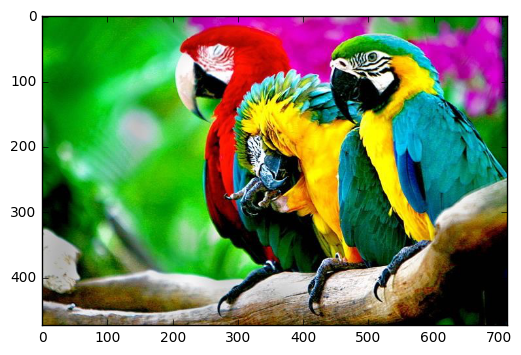

In [3]:
import pylab
%matplotlib inline

pylab.imshow(image)
pylab.show()

In [5]:
image = sk.img_as_float(image)

In [6]:
import pandas as pd
import numpy as np

h, w, rgb = image.shape

features = pd.DataFrame(np.reshape(image, (h * w, rgb)), columns=['r', 'g', 'b'])

In [12]:
from sklearn.cluster import KMeans

kmean = KMeans(init='k-means++', random_state=241)
k1 = kmean.fit(features)
k2 = kmean.fit_predict(features)
np.sum(k2 == k1.labels_) == h*w

True

In [1]:
# peak signal-to-noise ratio
def psnr_func(image, mean_img):
#     print type(image), type(mean_img)
    mse = np.mean(np.power(image - mean_img, 2))
#     max_pixel = np.array([np.max(np.transpose(image)[i]) for i in xrange(rgb)])[0]
    psnr = 10 * np.log10(np.power(float(1.), 2)/mse) 
    return psnr

In [2]:
from sklearn.cluster import KMeans
def mean_image(mean_img, features, n_clusters):       
    for i in xrange(n_clusters):
        mean_img.loc[mean_img.cluster == i, 'r'] = features[features.cluster == i].mean().r
        mean_img.loc[mean_img.cluster == i, 'g']  = features[features.cluster == i].mean().g
        mean_img.loc[mean_img.cluster == i, 'b']  = features[features.cluster == i].mean().b
    mean_img = mean_img.drop('cluster', 1).as_matrix().reshape((h, w, rgb))
    return mean_img

def median_image(median_img,features, n_clusters):
    for i in xrange(n_clusters):
        median_img.loc[median_img.cluster == i, 'r'] = features[features.cluster == i].median().r
        median_img.loc[median_img.cluster == i, 'g'] = features[features.cluster == i].median().g
        median_img.loc[median_img.cluster == i, 'b'] = features[features.cluster == i].median().b
    median_img = median_img.drop('cluster', 1).as_matrix().reshape((h, w, rgb))
    return median_img


def cluster(features, n_clusters):
    kmean = KMeans(n_clusters = n_clusters, init='k-means++', random_state=241)
    kmean.fit(features)    
    features['cluster'] = kmean.labels_
    
    mean_img = features.copy()
    median_img = features.copy()
    
    mean_img = mean_image(mean_img, features, n_clusters)
         
    median_img = median_image(median_img, features, n_clusters)
    
    return mean_img, median_img

In [7]:
for j in xrange(11, 21):
    print 'Number of cluster', j
    mean_img, median_img = cluster(features, j)
    psnr_mean = psnr_func(image, mean_img)
    psnr_median = psnr_func(image, median_img)
    print psnr_mean, psnr_median
    
    if psnr_mean > 20 or psnr_median > 20 :
        print j
        break

Number of cluster 11
20.1788075422 19.9060725952
11


In [13]:
with open('q1.txt', 'w') as f:
    f.write(str(j))
f.close()

mean image


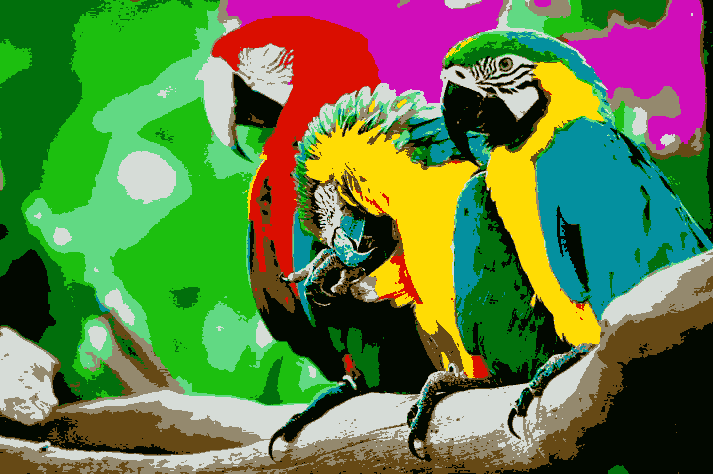

In [8]:
from scipy.misc import toimage

print 'mean image'
toimage(mean_img.reshape((h, w, rgb)))

medain image


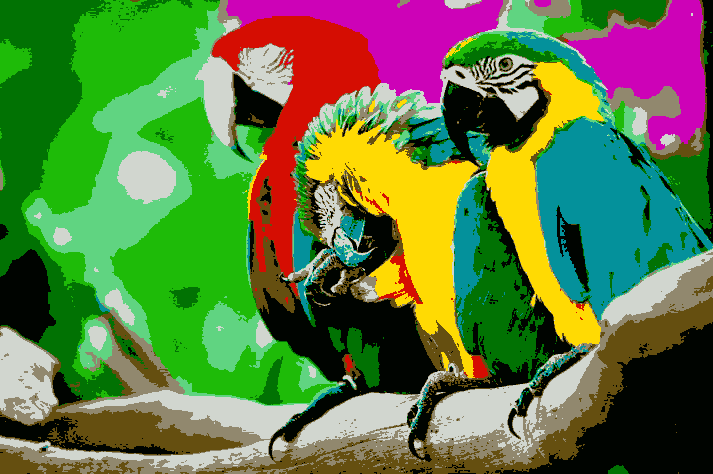

In [9]:
print 'medain image'
toimage(median_img.reshape(h, w, rgb))